In [0]:
!pip install datadotworld
!pip install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw
%matplotlib inline

In [0]:
drive.mount('/content/drive/')

In [11]:
cd "/content/drive/My Drive/dw_matrix_home/dataworkshop_matrix"

/content/drive/My Drive/dw_matrix_home/dataworkshop_matrix


In [15]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

LocalDataset('/root/.dw/cache/datafiniti/mens-shoe-prices/latest/datapackage.json')

In [0]:
df = data.dataframes['7004_1']

In [0]:
df.columns

In [0]:
df.prices_currency.unique()
df_usd = df[ df.prices_currency == 'USD'].copy()

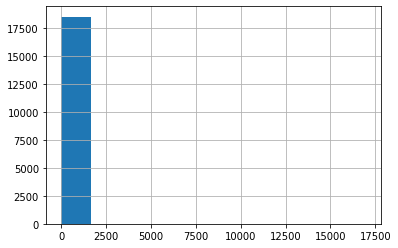

In [25]:
df_usd.prices_amountmin = df_usd.prices_amountmin.astype(np.float32)
df_usd.prices_amountmin.hist()

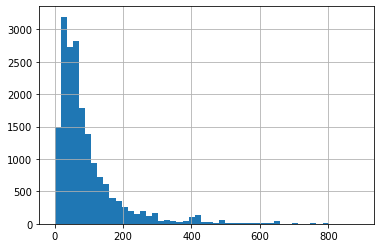

In [33]:
per_99th = np.percentile(df_usd.prices_amountmin, 99)
df_usd_99 = df_usd[ df_usd['prices_amountmin'] < per_99th]
df_usd_99.prices_amountmin.hist(bins=50)
df_usd_99.to_csv("data/men_shoes_prices_filtered.csv")